In [ ]:
# This notebook uses IEX's sandbox environment with unlimited monthly queries.

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta

from fbprophet import Prophet
from sklearn.metrics import mean_squared_error

In [2]:
import os
import requests

In [3]:
import env

credentials loaded successfully


In [ ]:
import pyEX as p

In [ ]:
c = p.Client(api_token = env.token, version = 'stable')

In [4]:
import iexfinance as iex

In [5]:
os.environ['IEX_API_VERSION'] = 'iexcloud-sandbox'

In [6]:
os.environ['IEX_TOKEN'] = env.sandbox_token

In [7]:
from iexfinance.stocks import get_historical_data

In [8]:
now = datetime.date.today()
now

datetime.date(2021, 1, 29)

In [9]:
start = datetime.datetime(2017, 1, 1)
end = now

In [10]:
spy = get_historical_data("SPY", start, end, output_format = 'pandas')

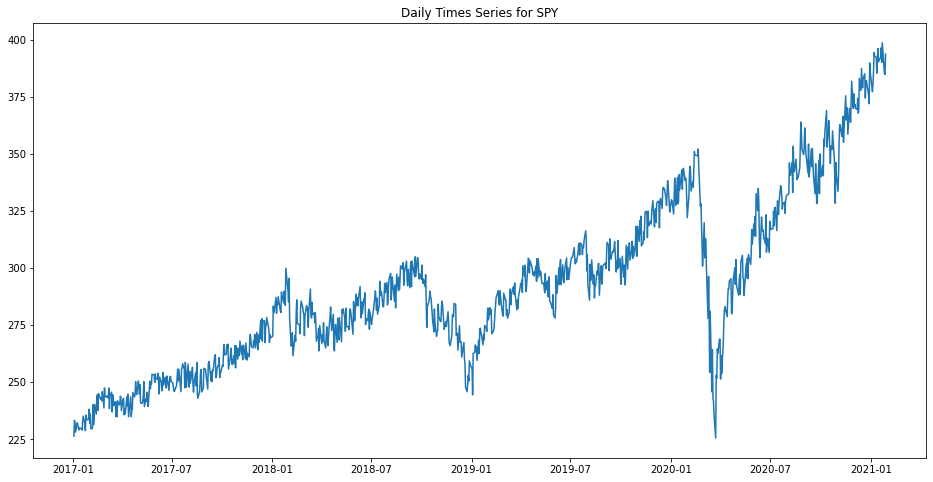

In [11]:
plt.figure(figsize = (16, 8))
plt.plot(spy.index, spy['close'])
plt.title("Daily Times Series for SPY")
plt.show()

In [12]:
tsla = get_historical_data("TSLA", start, end, output_format = 'pandas')

In [13]:
tsla

,open,high,low,close,volume
date,,,,,
2017-01-03,43.441,44.297,42.659,44.012,30247274
2017-01-04,43.160,47.900,43.304,47.374,58342780
2017-01-05,46.193,46.277,44.490,45.620,30352766
2017-01-06,45.984,46.493,45.660,48.003,28098530
2017-01-09,47.117,48.630,46.400,47.472,20465616
...,...,...,...,...,...
2021-01-22,869.330,854.000,855.100,871.780,20542889
2021-01-25,888.000,935.700,864.158,894.600,43217406
2021-01-26,915.130,916.200,883.300,924.640,23965812


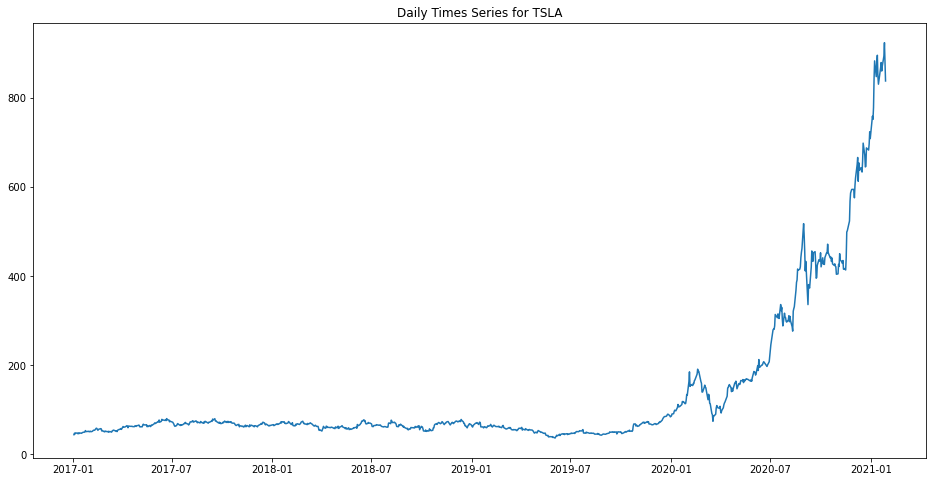

In [14]:
plt.figure(figsize = (16, 8))
plt.plot(tsla.index, tsla['close'])
plt.title("Daily Times Series for TSLA")
plt.show()

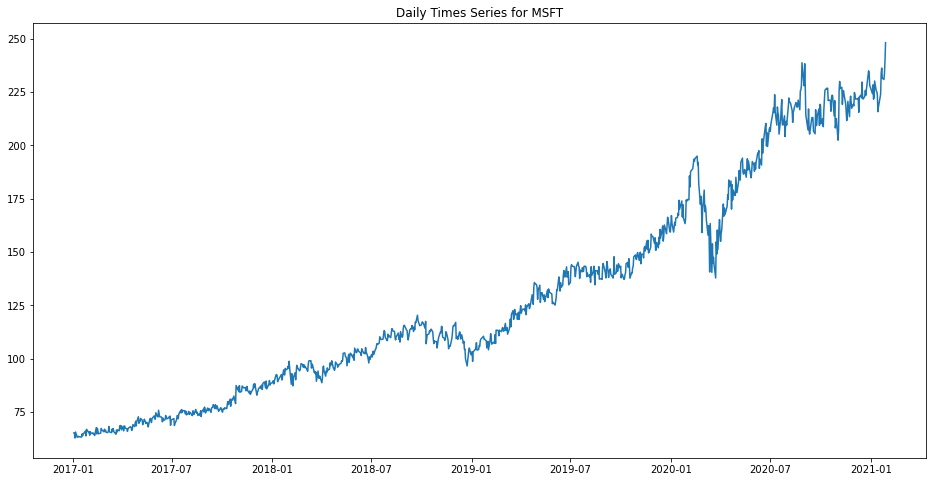

In [15]:
# Creating a function for this process:

msft = get_historical_data("MSFT", start, end, output_format = 'pandas')

plt.figure(figsize = (16, 8))
plt.plot(msft.index, msft['close'])
plt.title("Daily Times Series for MSFT")
plt.show()

In [16]:
def get_stock_chart(ticker, start_date, end_date, output_format = 'pandas'):
    
    '''This function will take the inputs from the user as to ticker, start date, end date, and default output format
    and return a chart with the requested stock/ticker.'''
    
    ticker = get_historical_data(str(ticker), start_date, end_date, output_format = 'pandas')
    plt.figure(figsize = (16, 8))
    plt.plot(ticker.index, ticker['close'])
    plt.title(f"Daily Times Series for {ticker}")
    plt.show()
    

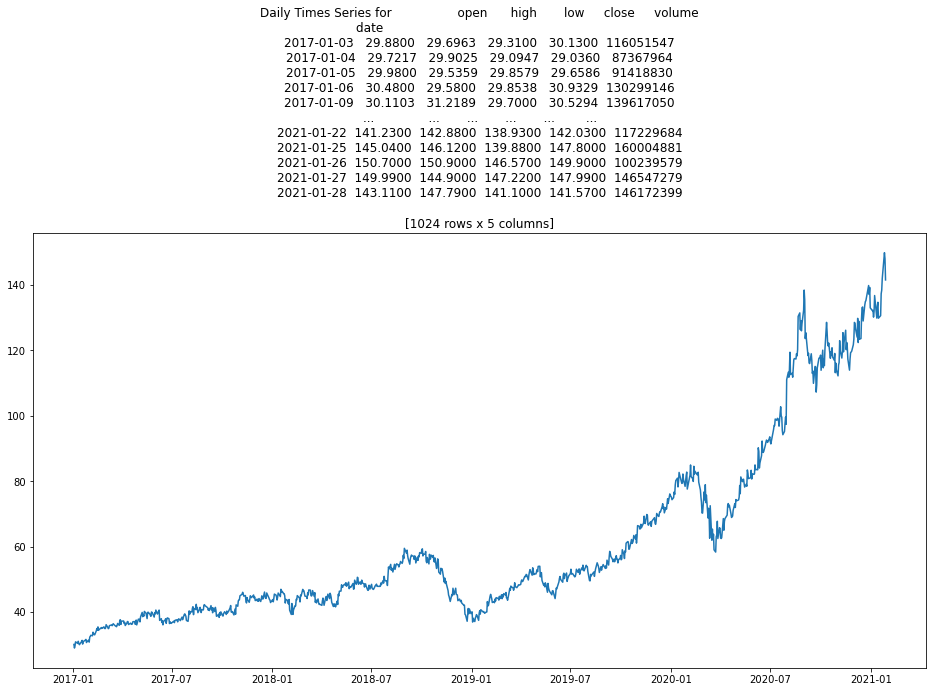

In [17]:
get_stock_chart("AAPL", start, end)

In [18]:
# Now adding user inputs:

In [19]:
# starting = datetime(input())

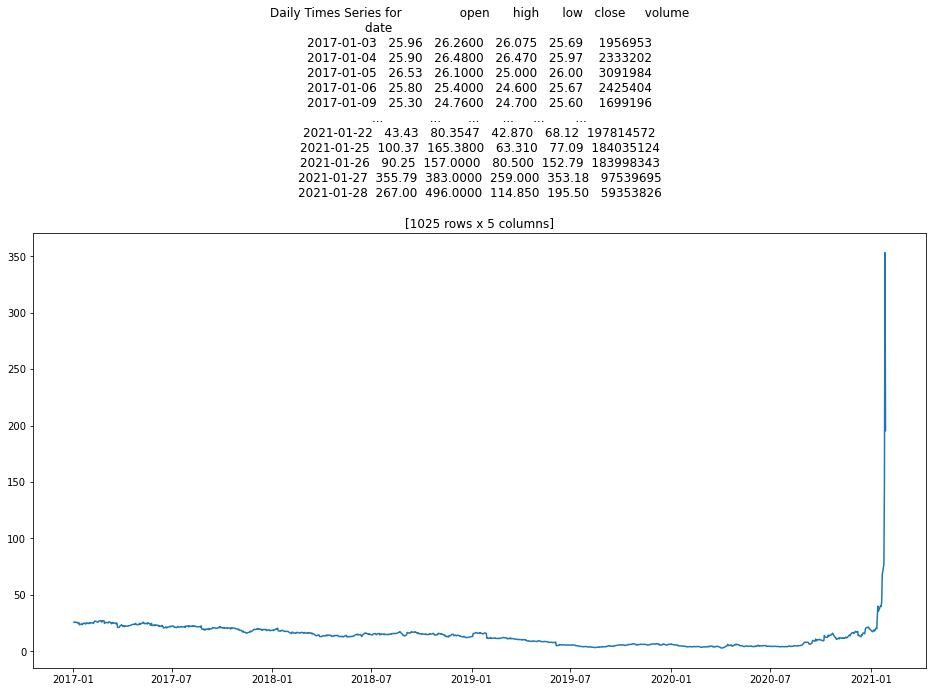

In [20]:
get_stock_chart("GME", start, end)

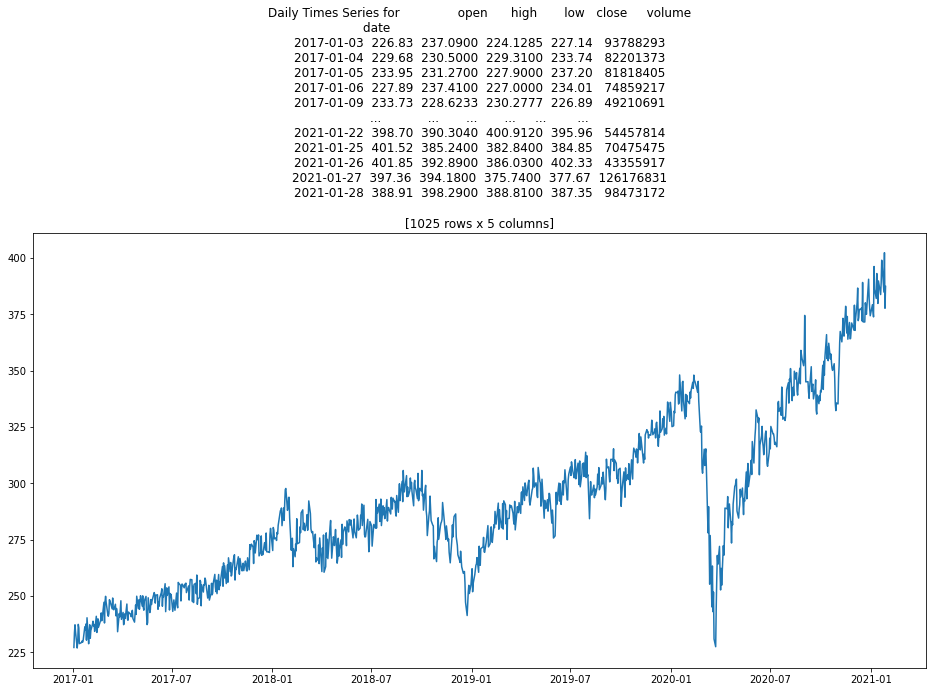

In [21]:
get_stock_chart("SPY", start, end)

-----------------

In [22]:
# Status update

In [23]:
import requests

In [24]:
import env

In [25]:
r = requests.get(f"https://api.orats.io/datav2/cores?token={env.orats_token}&ticker=AAPL")
r.json()

{'message': 'Not Found.'}

In [26]:
from pandas.tseries.offsets import BDay

In [27]:
today_date = datetime.datetime.today()
print(today_date)

2021-01-29 08:39:27.944973


In [28]:
yesterday_date = (today_date - BDay(1))

In [29]:
from polygon import RESTClient


def main():
    key = env.polygon_test_key

    # RESTClient can be used as a context manager to facilitate closing the underlying http session
    # https://requests.readthedocs.io/en/master/user/advanced/#session-objects
    with RESTClient(key) as client:
        resp = client.stocks_equities_daily_open_close("AAPL", "2021-01-25")
        print(f"On: {resp.from_} Apple opened at {resp.open} and closed at {resp.close}")


if __name__ == '__main__':
    main()

On: 2021-01-25 Apple opened at 143.07 and closed at 142.92


In [30]:
import datetime

from polygon import RESTClient


def ts_to_datetime(ts) -> str:
    return datetime.datetime.fromtimestamp(ts / 1000.0).strftime('%Y-%m-%d %H:%M')


def main():
    key = env.polygon_test_key

    # RESTClient can be used as a context manager to facilitate closing the underlying http session
    # https://requests.readthedocs.io/en/master/user/advanced/#session-objects
    with RESTClient(key) as client:
        from_ = "2019-01-01"
        to = "2019-02-01"
        resp = client.stocks_equities_aggregates("AAPL", 1, "minute", from_, to, unadjusted=False)

        print(f"Minute aggregates for {resp.ticker} between {from_} and {to}.")

        for result in resp.results:
            dt = ts_to_datetime(result["t"])
            print(f"{dt}\n\tO: {result['o']}\n\tH: {result['h']}\n\tL: {result['l']}\n\tC: {result['c']} ")


if __name__ == '__main__':
    main()

Minute aggregates for AAPL between 2019-01-01 and 2019-02-01.
2019-01-30 08:39
	O: 40.5898
	H: 40.6325
	L: 40.5725
	C: 40.5759 
2019-01-30 08:40
	O: 40.5752
	H: 40.5925
	L: 40.5125
	C: 40.5125 
2019-01-30 08:41
	O: 40.5125
	H: 40.56
	L: 40.3625
	C: 40.3675 
2019-01-30 08:42
	O: 40.3675
	H: 40.435
	L: 40.3388
	C: 40.4228 
2019-01-30 08:43
	O: 40.4217
	H: 40.5
	L: 40.3825
	C: 40.435 
2019-01-30 08:44
	O: 40.44
	H: 40.44
	L: 40.355
	C: 40.355 
2019-01-30 08:45
	O: 40.36
	H: 40.5175
	L: 40.355
	C: 40.4725 
2019-01-30 08:46
	O: 40.4825
	H: 40.5175
	L: 40.45
	C: 40.4675 
2019-01-30 08:47
	O: 40.4625
	H: 40.4675
	L: 40.395
	C: 40.4412 
2019-01-30 08:48
	O: 40.4375
	H: 40.4575
	L: 40.375
	C: 40.3925 
2019-01-30 08:49
	O: 40.3938
	H: 40.45
	L: 40.38
	C: 40.435 
2019-01-30 08:50
	O: 40.4375
	H: 40.4731
	L: 40.3775
	C: 40.3775 
2019-01-30 08:51
	O: 40.3775
	H: 40.4125
	L: 40.335
	C: 40.357 
2019-01-30 08:52
	O: 40.357
	H: 40.3975
	L: 40.3525
	C: 40.36 
2019-01-30 08:53
	O: 40.3605
	H: 40.3643
	L:

2019-02-01 14:10
	O: 41.5225
	H: 41.525
	L: 41.505
	C: 41.5125 
2019-02-01 14:11
	O: 41.515
	H: 41.55
	L: 41.49
	C: 41.5461 
2019-02-01 14:12
	O: 41.5475
	H: 41.5483
	L: 41.5325
	C: 41.5413 
2019-02-01 14:13
	O: 41.5425
	H: 41.55
	L: 41.525
	C: 41.525 
2019-02-01 14:14
	O: 41.5225
	H: 41.5525
	L: 41.5225
	C: 41.55 
2019-02-01 14:15
	O: 41.5525
	H: 41.575
	L: 41.5425
	C: 41.565 
2019-02-01 14:16
	O: 41.5675
	H: 41.585
	L: 41.55
	C: 41.58 
2019-02-01 14:17
	O: 41.5775
	H: 41.5925
	L: 41.5575
	C: 41.5875 
2019-02-01 14:18
	O: 41.585
	H: 41.5988
	L: 41.575
	C: 41.58 
2019-02-01 14:19
	O: 41.5813
	H: 41.59
	L: 41.5625
	C: 41.575 
2019-02-01 14:20
	O: 41.575
	H: 41.59
	L: 41.565
	C: 41.5675 
2019-02-01 14:21
	O: 41.5675
	H: 41.5788
	L: 41.5575
	C: 41.5625 
2019-02-01 14:22
	O: 41.5625
	H: 41.5875
	L: 41.55
	C: 41.5871 
2019-02-01 14:23
	O: 41.585
	H: 41.5938
	L: 41.575
	C: 41.5859 
2019-02-01 14:24
	O: 41.585
	H: 41.595
	L: 41.58
	C: 41.59 
2019-02-01 14:25
	O: 41.59
	H: 41.6
	L: 41.5725
	C: